# Amazon Products Recommendation System

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Data 1

In [2]:
Amazon = pd.read_csv('Amazon-clothing-info.csv')
Amazon.shape

(28395, 19)

In [3]:
amazon = Amazon[['asin','formatted_price','title','medium_image_url']]
amazon.head()

,asin,formatted_price,title,medium_image_url
0,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...
1,B012YX2ZPI,$9.99,Women's Unique 100% Cotton T - Special Olympic...,https://images-na.ssl-images-amazon.com/images...
2,B001LOUGE4,$11.99,Ladies Cotton Tank 2x1 Ribbed Tank Top,https://images-na.ssl-images-amazon.com/images...
3,B003BSRPB0,$20.54,FeatherLite Ladies' Moisture Free Mesh Sport S...,https://images-na.ssl-images-amazon.com/images...
4,B014ICEDNA,$7.50,Supernatural Chibis Sam Dean And Castiel Short...,https://images-na.ssl-images-amazon.com/images...


#### Data 2

In [4]:
Clothing = pd.read_csv('Clothing-Reviews.csv')
Clothing.shape

(50046, 6)

In [5]:
clothing = Clothing[['asin','review_userId','review_score']]
clothing.head()

,asin,review_userId,review_score
0,B004GSI2OS,A174NPQZ1EABX1,5
1,B004GSI2OS,A17ZI8VKZJFOV8,5
2,B004GSI2OS,A2F9LXG1QEJ855,4
3,B004GSI2OS,A2FGXHSHF0OD17,5
4,B004GSI2OS,A2O2E8BLB7VW1U,5


#### Merging Data 1 and Data 2

In [6]:
data = pd.merge(amazon,clothing,on='asin')
data.head()

,asin,formatted_price,title,medium_image_url,review_userId,review_score
0,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...,A174NPQZ1EABX1,5
1,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...,A17ZI8VKZJFOV8,5
2,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...,A2F9LXG1QEJ855,4
3,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...,A2FGXHSHF0OD17,5
4,B004GSI2OS,$26.26,Featherlite Ladies' Long Sleeve Stain Resistan...,https://images-na.ssl-images-amazon.com/images...,A2O2E8BLB7VW1U,5


In [7]:
data.shape

(50046, 6)

#### Creating a new DataFrame with rating mean and rating count

In [8]:
Ratings = pd.DataFrame(data.groupby('asin')['review_score'].mean())
Ratings['rating_count'] = data.groupby('asin')['review_score'].count()
Ratings.sort_values(by='rating_count',ascending=False).head()

,review_score,rating_count
asin,,
B071NS6YRQ,4.441214,791
B074PT8XGT,3.401266,790
B071GTYV9W,4.562264,530
B01KMYK9A4,4.342949,312
B0143GG42E,4.270096,311


In [9]:
Ratings.describe()

,review_score,rating_count
count,6584.000000,6584.000000
mean,4.037465,7.601154
std,1.109846,24.337114
min,1.000000,1.000000
25%,3.600000,1.000000
50%,4.333333,2.000000
75%,5.000000,5.000000
max,5.000000,791.000000


#### Pivot table

In [10]:
crosstab = pd.pivot_table(data=data,index='review_userId',columns='asin',values='review_score')
crosstab

asin,B000EK4P0W,B000HHPB0A,B000M6W02I,B000M9R322,B000OF2PFE,B000RIAZEG,B000SJG9C6,B000VA0K5O,B000XRUNFW,B00118UDFW,...,B075B2KSBX,B075B2QQY4,B075B6FRFB,B075BGV8HC,B075BMN7FP,B075BNFWYV,B075BP359P,B075BSMDY9,B075BT5JKZ,B075CG1KY3
review_userId,,,,,,,,,,,,,,,,,,,,,
A04728973KCBB7PLQB2BC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A05590483FAOIB9CFW4A9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A057523234N4Y49RPS4G2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10076813OCUIPC1QBYZD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A1007NP5HDQ8N7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZWJR1508PTTD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZXWPBQC27BYY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AZY065T0PVYO7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
myitem = crosstab['B071NS6YRQ']

similar_to_myitem = crosstab.corrwith(myitem)
corr_df = pd.DataFrame(similar_to_myitem,columns=['PearsonR'])
corr_df.dropna(inplace=True)
corr_df.head()

,PearsonR
asin,
B000M9R322,-0.269408
B000VA0K5O,0.311086
B0014DLE5C,0.196489
B0016N8OIA,1.000000
B001EVK62Q,-1.000000


In [12]:
corr_df_summary = corr_df.join(Ratings['rating_count'])
corr_df_summary[corr_df_summary['rating_count'] >= 20].sort_values('PearsonR',ascending=False).head(10)

,PearsonR,rating_count
asin,,
B00CA7V2QM,1.000000,22
B071NS6YRQ,1.000000,791
B06XQ5NXMZ,1.000000,66
B071G88V91,0.962250,52
B074TZFMFN,0.801784,21
B072QF6DX6,0.797017,88
B0198L7I9M,0.714828,22
B071NKX2VJ,0.693427,23
B017RPMWSI,0.619725,22


In [13]:
recommended_products = ['B074TZFMFN','B072QF6DX6','B0198L7I9M','B071NKX2VJ','B073P9D2QP']

for i in Amazon[Amazon['asin'].isin(recommended_products)]['medium_image_url']:
    print(i)

https://images-na.ssl-images-amazon.com/images/I/51-yWXvptzL._SL160_.jpg
https://images-na.ssl-images-amazon.com/images/I/41sxN7hIi%2BL._SL160_.jpg
https://images-na.ssl-images-amazon.com/images/I/51FA%2B0O%2B4uL._SL160_.jpg
https://images-na.ssl-images-amazon.com/images/I/51kJu0nHeeL._SL160_.jpg
https://images-na.ssl-images-amazon.com/images/I/51TyiFNzUJL._SL160_.jpg


#### My Item

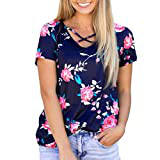

In [14]:
from urllib.request import urlopen
from PIL import Image

img = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/51VPhSdjSHL._SL160_.jpg'))
img

#### Recommended Items

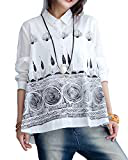

In [15]:
img1 = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/51-yWXvptzL._SL160_.jpg'))
img1

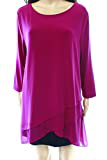

In [16]:
img2 = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/41sxN7hIi%2BL._SL160_.jpg'))
img2

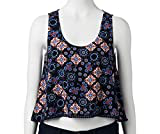

In [17]:
img3 = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/51FA%2B0O%2B4uL._SL160_.jpg'))
img3

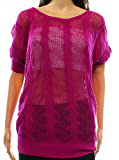

In [18]:
img4 = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/51kJu0nHeeL._SL160_.jpg'))
img4

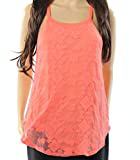

In [19]:
img5 = Image.open(urlopen('https://images-na.ssl-images-amazon.com/images/I/51TyiFNzUJL._SL160_.jpg'))
img5